# **ONLINE RETAIL ANALYSIS**

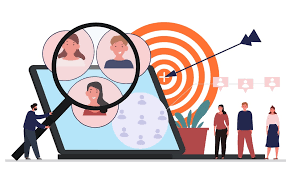

## **1. INTRODUCTION**

#### **1.0 OVERVIEW**
This project is focused on customer segmentation for targeted marketing using using ***RFM*** analysis. It involves the Segment of customers into behavioral groups using RFM (Recency, Frequency, Monetary) analysis to help the business target its marketing more effectively. It combined the use of SQL & Python.


#### **1.1 DATA DESCRIPTION**

## **2. REPOSITORY**

#### **2.0 IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import sqlite3

#### **2.1 LOAD DATASET**

In [ ]:
# loading the retail data
Retail = pd.read_csv("Retail Online.csv", encoding = "latin1")
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# the shape of the data
Retail.shape

(541909, 8)

This dataset contains ***541909*** rows and ***8*** columns

In [ ]:
# information about the data
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


This dataset contains both categorical and numerical values. The numerical values are in columns ***Quantity***, ***UnitPrice***, ***CustomerID***, while the other columns consists of categorical values.

## **3. EXPLORATORY DATA ANALYSIS**

In [ ]:
# checking for missing values
Retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


The data has 1454 missing values in the description column and 135080 missing data in the customerid column. For the sake of this project, the description column is not needed, so it would be dropped along side the rows of the missing values in the customerid column & the stock code column

In [ ]:
# dropping all the rows with missing values
Retail.dropna(inplace=True)

In [ ]:
# verifying
Retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# new dataset shape
Retail.shape

(406829, 8)

In [ ]:
# dropping the description column and the stock code column
Retail.drop(["StockCode"], axis=1, inplace=True)

# verify
Retail.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Columns successfully dropped

In [ ]:
# check for duplicates
Retail.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


The datasets contains duplicated and these duplicates need to be dropped.

In [ ]:
# dropping duplicates of every row with duplicates
Retail.drop_duplicates(inplace=True)

# verify
Retail.shape

(401568, 7)

After dropping duplicates, the number of rows left to work with are ***255400***

In [ ]:
# statistic summary of numerical values
Retail.describe()

,Quantity,UnitPrice,CustomerID
count,401568.000000,401568.000000,401568.000000
mean,12.183702,3.474284,15281.146284
std,250.294228,69.767158,1714.004934
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16782.500000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Fixing the data type for the date
Retail["InvoiceDate"] = pd.to_datetime(Retail["InvoiceDate"])

# verify
Retail.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### **3.1 Countries in the Dataset**

In [ ]:
# unique countries in the dataset
Retail["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
# number of unique countries
Retail["Country"].nunique()

37

There are 37 unique countries in this dataset


In [ ]:
# valuecount of customer's by their country
Retail.groupby("Country")["CustomerID"].value_counts()

Country         CustomerID
Australia       12415.0       778
                12431.0       185
                12388.0       100
                12393.0        64
                12434.0        54
                             ... 
United Kingdom  18233.0         1
Unspecified     12743.0       131
                16320.0        56
                14265.0        31
                12363.0        23
Name: count, Length: 4380, dtype: int64

#### **3.2 Top 10 countries by Transaction (Excluding United Kingdom)**

In [ ]:
# Top 10 countries by their transaction, exclusing the united kingdom

country_counts = Retail[Retail["Country"] != "United Kingdom"].groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False).head(10)
country_counts

,InvoiceNo
Country,
Germany,603
France,458
EIRE,319
Belgium,119
Spain,105
Netherlands,101
Switzerland,71
Portugal,70
Australia,69


<ipython-input-103-abb5d78fcf62>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


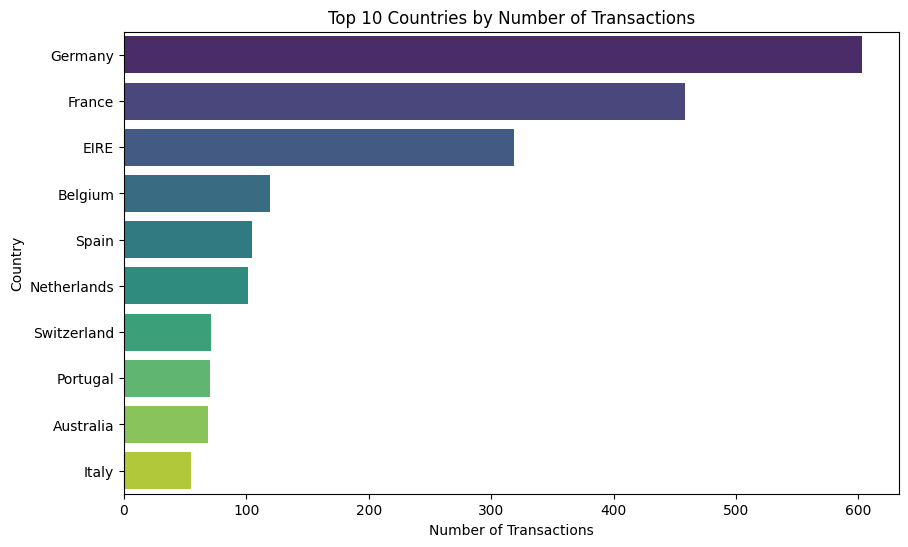

In [ ]:

# visualising the above

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

#### **3.3 Top Selling Products**

In [ ]:
# Top selling products
top_products = Retail.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
WHITE HANGING HEART T-LIGHT HOLDER,34128
PACK OF 72 RETROSPOT CAKE CASES,33386
POPCORN HOLDER,30492
RABBIT NIGHT LIGHT,27045
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25305


<ipython-input-105-30b826dacf74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


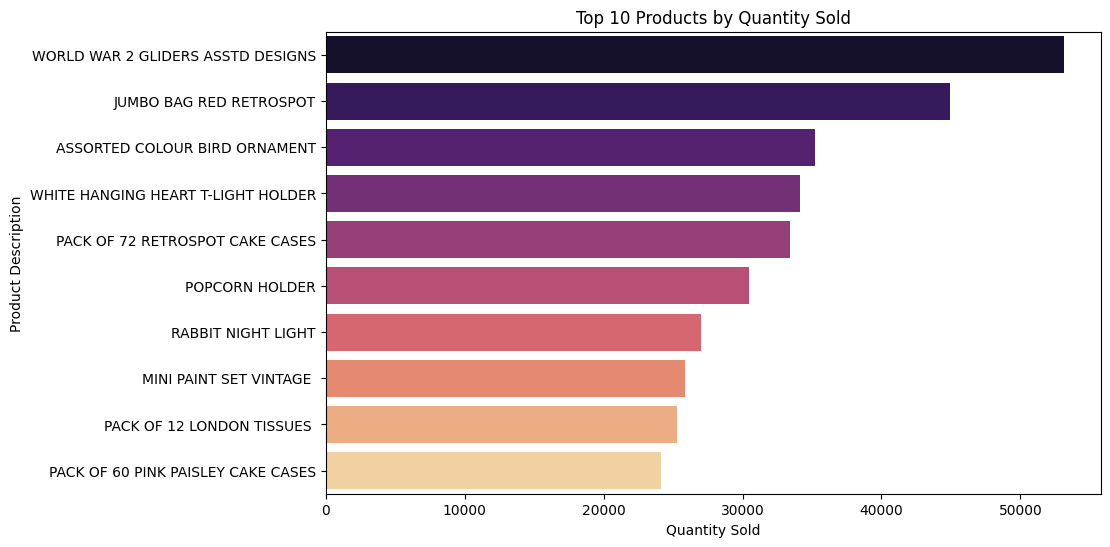

In [ ]:
# Visualise the above

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()

#### **3.4 Monthly Revenue**

In [ ]:
# monthly revenue trend

# creating a new column for the month to be able to view trend
Retail["Month"] = Retail["InvoiceDate"].dt.to_period("M")

# Grouping by month to calculate revenu
monthly_revenue = Retail.groupby('Month').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
monthly_revenue

<ipython-input-106-d3a8acfb19cd>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_revenue = Retail.groupby('Month').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())


,0
Month,
2010-12,552326.760
2011-01,473698.300
2011-02,435531.570
2011-03,578553.710
2011-04,425217.671
2011-05,646989.870
2011-06,606861.270
2011-07,573108.571
2011-08,615068.090


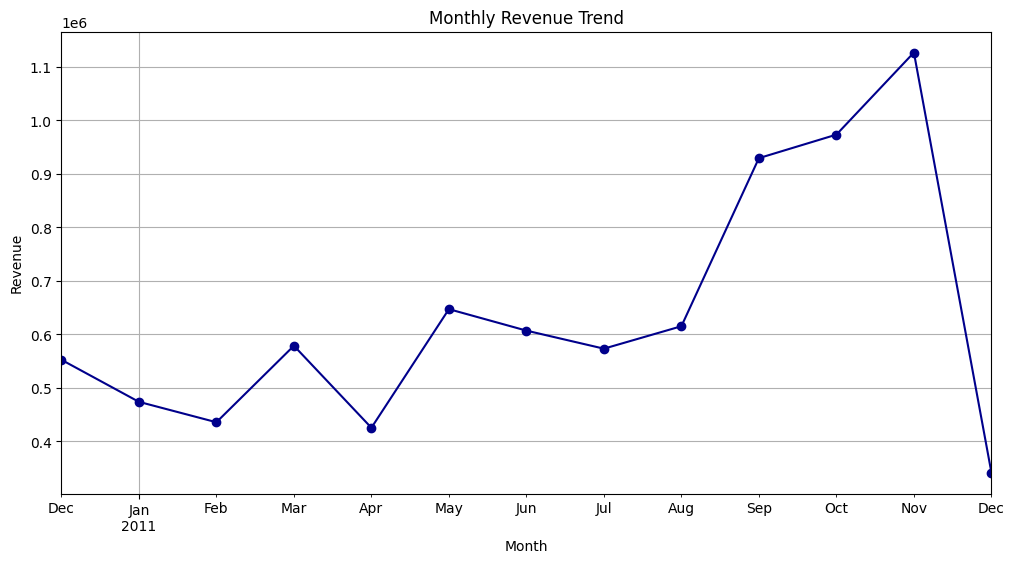

In [ ]:
# visualize
monthly_revenue.plot(kind='line', figsize=(12, 6), color='darkblue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

## **Conclusion**

This exploratory data analysis provided valuable insights into the Online Retail dataset. By cleaning the data and visualizing key metrics, the following were identified:

* The top-performing countries by transaction volume, with the UK leading significantly.
* The most frequently purchased products, giving clues on consumer demand patterns.
* Clear monthly revenue trends, indicating seasonality and potential sales peaks.

These findings can help retail businesses make informed decisions around inventory planning, marketing strategies, and customer targeting. The project also demonstrated the importance of thorough data cleaning and visualization in uncovering meaningful business insights.